# Utilizando auto arima (pmdarima)

In [1]:
import pmdarima as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from pmdarima.datasets import load_wineind

# this is a dataset from R
wineind = load_wineind().astype(np.float64)

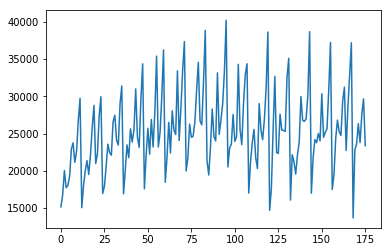

In [10]:
plt.plot(wineind);

In [11]:
# fit stepwise auto-ARIMA
stepwise_fit = pm.auto_arima(wineind, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3066.760, BIC=3082.229, Fit time=1.557 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=3133.376, BIC=3139.564, Fit time=0.029 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=3099.734, BIC=3112.109, Fit time=0.253 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3066.930, BIC=3079.305, Fit time=0.273 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3067.548, BIC=3086.110, Fit time=1.500 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=3088.088, BIC=3100.463, Fit time=0.156 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=3068.000, BIC=3086.563, Fit time=1.188 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3068.915, BIC=3090.571, Fit time=3.032 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3067.447, BIC=3086.010, Fit time=0.556 seconds
Fit ARIMA: order=(1, 1, 0) s

In [12]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  176
Model:             SARIMAX(1, 1, 2)x(0, 1, 1, 12)   Log Likelihood               -1527.371
Date:                            Mon, 29 Apr 2019   AIC                           3066.742
Time:                                    17:26:04   BIC                           3085.305
Sample:                                         0   HQIC                          3074.278
                                            - 176                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -100.7331     72.197     -1.395      0.163    -242.236      40.770
ar.L1         -0.5123      0.390     -1.312      0.189      -1.277       0.253
ma.L1         -0.0806      0.404     -0.200      0.842      -0.872       0.711
ma.L2         -0.4430      0.224     -1.978      0.048      -0.882      -0.004
ma.S.L12      -0.4025      0.054     -7.448      0.000      -0.508      -0.297
sigma2      7.663e+06    7.3e+05     10.495      0.000    6.23e+06    9.09e+06
===================================================================================
Ljung-Box (Q):                       48.70   Jarque-Bera (JB):                21.57
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            -0.61
Prob(H) (two-sided):                  0.54   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.14e+14. Standard errors may be unstable.
"""

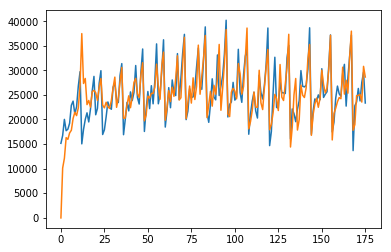

In [17]:
plt.plot(wineind)
plt.plot(stepwise_fit.predict_in_sample())